In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 


%matplotlib inline

匯入data

In [6]:
x = np.genfromtxt('preprocessed_x.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y.csv', delimiter=',', dtype= None)

/var/folders/pm/0l7hctnj2cxcz2j52rqsnw5c0000gn/T/ipykernel_12896/3448424959.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  y = np.genfromtxt('preprocessed_y.csv', delimiter=',', dtype= None)


                   precision    recall  f1-score   support

      b'bathroom'       0.12      0.20      0.15        10
       b'driving'       0.10      0.16      0.12        31
        b'eating'       0.17      0.14      0.15        58
         b'lying'       0.66      0.71      0.68       240
         b'other'       0.16      0.10      0.12        78
        b'riding'       0.06      0.07      0.06        15
b'riding_bicycle'       0.00      0.00      0.00        17
       b'sitting'       0.32      0.32      0.32       187
      b'sleeping'       0.00      0.00      0.00        15
      b'standing'       0.00      0.00      0.00         7
b'using_computer'       0.46      0.46      0.46       159
       b'walking'       0.43      0.33      0.38        90

         accuracy                           0.39       907
        macro avg       0.21      0.21      0.20       907
     weighted avg       0.39      0.39      0.39       907



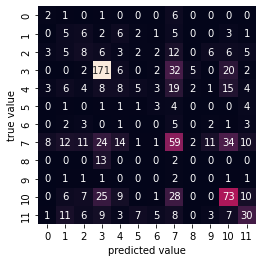

In [7]:
dt = DecisionTreeClassifier()


fin_test = np.array([])
fin_pred = np.array([])

for i,(train, test) in enumerate(KFold(n_splits=5).split(x)):
    #Train-Test-Split
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    dt.fit(x_train, y_train)

    fin_test = np.concatenate((fin_test, y_test), axis=0)
    fin_pred = np.concatenate((fin_pred, dt.predict(x_test)), axis=0)

print(classification_report(fin_test, fin_pred))

sns.heatmap(confusion_matrix(fin_test, fin_pred), square= True, fmt ='.0f', annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
